In [18]:
%matplotlib inline

In [102]:
import matplotlib.pyplot as plt
from random import choice
import seaborn as sns
from sqt.align import hamming_distance

sns.set()

In [109]:
def read_barcodes(path):
    with open(path) as f:
        barcodes = [s.strip() for s in f if s != 'Barcode\n']
    assert len(set(barcodes)) == len(barcodes)
    return barcodes

In [120]:
def simulate_barcodes(n, length=30):
    barcodes = set()
    while len(barcodes) < n:
        s = ''.join(choice('ACGT') for i in range(length))
        barcodes.add(s)
    return list(barcodes)

In [121]:
def compute_distances(sequences):
    distances = []
    for i, x in enumerate(sequences):
        for j in range(i+1, len(sequences)):
            y = barcodes[j]
            if len(x) != len(y):
                print(x, y)
            d = hamming_distance(x, y)
            distances.append(d)
    return distances

In [139]:
barcodes = read_barcodes('barcodes.txt')
n = len(barcodes)
print(n)
length = len(barcodes[0])
barcodes_s = simulate_barcodes(n, length)
print(len(barcodes_s))

4017
4017


In [140]:
distances_r = compute_distances(barcodes)
distances_s = compute_distances(barcodes_s)

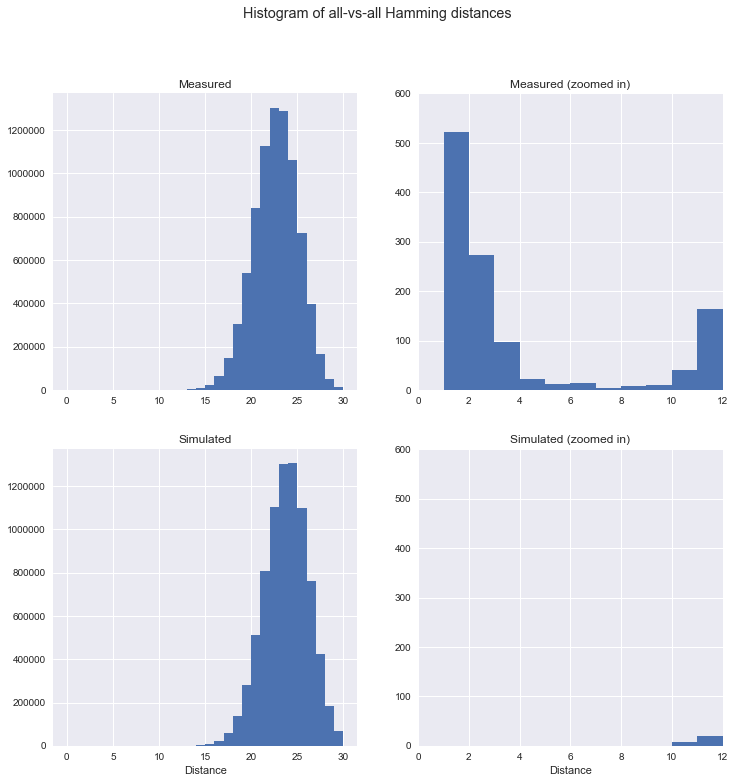

In [144]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
fig.suptitle('Histogram of all-vs-all Hamming distances')
for distances, (ax_left, ax_right) in zip([distances_r, distances_s], axes):
    ax_left.hist(distances, bins=range(31))
    ax_right.hist(distances, bins=range(31))
    ax_right.set_ylim(0, 600)
    ax_right.set_xlim(0, 12)

axes[0][0].set_title('Measured')
axes[0][1].set_title('Measured (zoomed in)')
axes[1][0].set_title('Simulated')
axes[1][1].set_title('Simulated (zoomed in)')

for ax in axes[1]:
    ax.set_xlabel('Distance')
fig.savefig('barcode-distance-histogram.pdf')

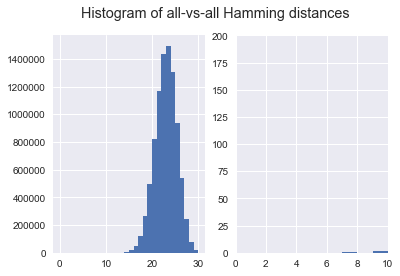

In [136]:
fig, (ax_left, ax_right) = plt.subplots(ncols=2)
fig.suptitle('Histogram of all-vs-all Hamming distances')
ax_left.hist(distances, bins=range(31))
ax_right.hist(distances, bins=range(31))
ax_right.set_ylim(0, 200)
ax_right.set_xlim(0, 10)

for ax in axes[1]:
    ax.set_xlabel('Distance')
#fig.savefig()